In [35]:
import numpy as np
import torch
from torch.utils.data import Dataset

In [23]:
class ToySet(Dataset):
    def __init__(self, length=100, transform=None):
        torch.manual_seed(101)
        self.x = 2 * torch.rand(length, 2)
        self.y = torch.ones(length, 1)
        self.len = length
        self.transform = transform
        
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)
        return sample
    
    def __len__(self):
        return self.len

In [24]:
test_set = ToySet()

len(test_set)

100

In [25]:
for i in range(3):
    x, y = test_set[i]
    print(x, y)

tensor([0.3961, 0.9006]) tensor([1.])
tensor([0.1818, 1.7744]) tensor([1.])
tensor([0.5788, 0.0372]) tensor([1.])


In [26]:
for x, y in test_set:
    print(x, y)
    break

tensor([0.3961, 0.9006]) tensor([1.])


In [27]:
data = iter(test_set)
for i in range(3):
    print(next(data))

(tensor([0.3961, 0.9006]), tensor([1.]))
(tensor([0.1818, 1.7744]), tensor([1.]))
(tensor([0.5788, 0.0372]), tensor([1.]))


In [28]:
def scaling(sample):
    x, y = sample
    scaled_x = x / 255.
    scaled_y = y / 10.
    return scaled_x, scaled_y

In [29]:
dataset_ = ToySet(10, transform=scaling)

len(dataset_)

10

In [30]:
dataset_[0], dataset_[-1]

((tensor([0.0016, 0.0035]), tensor([0.1000])),
 (tensor([0.0049, 0.0029]), tensor([0.1000])))

In [31]:
class AddOnes:
    def __init__(self, added=1):
        self.added = added
        
    def __call__(self, sample):
        x, y = sample
        x = x + self.added
        y = y + self.added
        sample = x, y
        return sample

In [32]:
a_m = AddOnes()

dataset_ = ToySet(10, transform=a_m)
dataset_[-1]

(tensor([2.2487, 1.7367]), tensor([2.]))

In [33]:
from torchvision import transforms

data_transforms = transforms.Compose([scaling, a_m])
data1 = ToySet(5, transform=data_transforms)
data1[-1]

(tensor([1.0034, 1.0057]), tensor([1.1000]))

In [34]:
from torchvision import transforms
from torchvision import datasets

In [36]:
crop_tensor_transform = transforms.Compose([
    transforms.CenterCrop(20),
    transforms.ToTensor()
])

training_data = datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=crop_tensor_transform,
)

test_data = datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=crop_tensor_transform,
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [45]:
print(training_data.data.shape)
print(test_data.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [50]:
training_data[0][1]

5

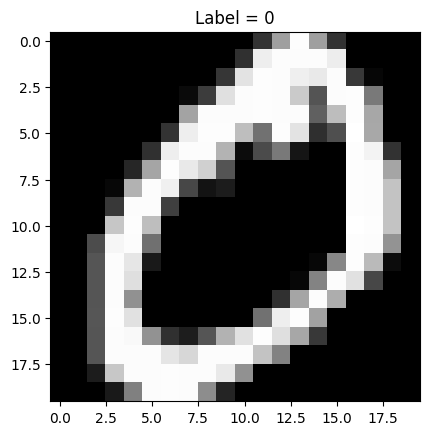

In [55]:
import matplotlib.pyplot as plt
plt.imshow(training_data[1][0].view(20, 20), cmap='gray')
plt.title("Label = {}".format(training_data[1][1]))
plt.show()

In [56]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

In [59]:
train_features, train_labels = next(iter(train_dataloader))
train_features.size(), train_labels.size()

(torch.Size([64, 1, 20, 20]), torch.Size([64]))

In [60]:
img = train_features[0].squeeze()
label = train_labels[0]
img.size(), label

(torch.Size([20, 20]), tensor(8))

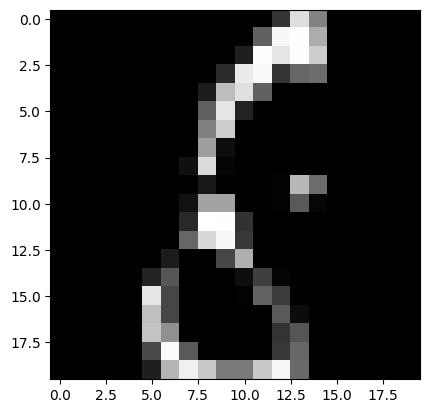

In [62]:
plt.imshow(img, cmap='gray')
plt.show()

In [63]:
from torch.utils.data import TensorDataset

In [64]:
X = np.random.randn(5, 4)
Y = np.random.randint(0, 2, size=5)

X_train = torch.from_numpy(X)
Y_train = torch.from_numpy(Y)

print(X_train)
print(Y_train)

tensor([[-0.5020,  0.9592,  1.1724,  1.3761],
        [-0.6913, -0.3048, -0.0084,  0.6502],
        [ 0.7777, -0.3688,  0.0084,  1.7824],
        [ 0.1823, -0.5389,  0.2256,  1.3743],
        [-0.6789,  0.4575,  0.4984,  0.7230]], dtype=torch.float64)
tensor([1, 1, 1, 0, 0])


In [65]:
train_ds = TensorDataset(X_train, Y_train)
train_dataloader_ = DataLoader(train_ds, batch_size=2, shuffle=False)
train_features_, train_labels_ = next(iter(train_dataloader_))
train_features_, train_labels_

(tensor([[-0.5020,  0.9592,  1.1724,  1.3761],
         [-0.6913, -0.3048, -0.0084,  0.6502]], dtype=torch.float64),
 tensor([1, 1]))